In [ ]:
# baseline cnn model for fashion mnist
from matplotlib import pyplot
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential ,load_model
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,KFold
import numpy as np

labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have a single channel
    for i in range(9):
      # define subplot
      pyplot.subplot(330 + 1 + i)
      # plot raw pixel data
      pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
  #     print(trainy[i])
    # show the figure
    pyplot.show()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    print("the shape of trainX: ",trainX.shape)
    print("the shape of testX: ",testX.shape)
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    print("the shape of trainY: ",trainY.shape)
    print("the shape of testY: ",testY.shape)
    return trainX, trainY, testX, testY


In [ ]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

4431872/4422102 [==============================] - 0s 0us/step


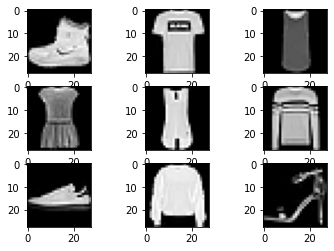

the shape of trainX:  (60000, 28, 28, 1)
the shape of testX:  (10000, 28, 28, 1)
the shape of trainY:  (60000, 10)
the shape of testY:  (10000, 10)


In [ ]:
# load dataset
trainX, trainY,testX, testY = load_dataset()

# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(10, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(10, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', kernel_initializer='he_uniform'))
   
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Flatten())
    model.add(Dense(800, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    lr = 0.01
    opt = SGD(learning_rate=lr, momentum=0.9,decay=lr / 10)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=25, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return model,scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [ ]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100,np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    # pyplot.boxplot(scores)
    # pyplot.show()

In [ ]:
def run_test_harness():
    # load dataset
    # trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    # trainX, testX = prep_pixels(trainX, testX)
    # evaluate model

    model,scores, histories = evaluate_model(trainX, trainY)
    print(len(histories))
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    return model,scores,histories


Epoch 1/25
1500/1500 [==============================] - 28s 10ms/step - loss: 0.7378 - accuracy: 0.7559 - val_loss: 0.4021 - val_accuracy: 0.8516
Epoch 2/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4642 - accuracy: 0.8317 - val_loss: 0.3676 - val_accuracy: 0.8606
Epoch 3/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4120 - accuracy: 0.8500 - val_loss: 0.3127 - val_accuracy: 0.8805
Epoch 4/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3875 - accuracy: 0.8596 - val_loss: 0.3041 - val_accuracy: 0.8856
Epoch 5/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3721 - accuracy: 0.8642 - val_loss: 0.2890 - val_accuracy: 0.8903
Epoch 6/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3560 - accuracy: 0.8698 - val_loss: 0.2860 - val_accuracy: 0.8909
Epoch 7/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3497 - accuracy: 0.8708 - val_loss: 0.2767 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


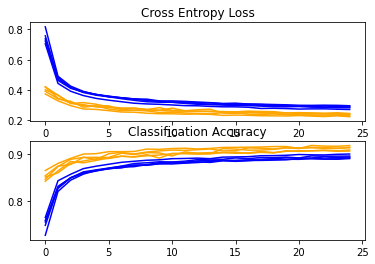

Accuracy: mean=91.257 std=0.416, n=5


In [ ]:
# entry point, run the test harness
model1,scores,histories = run_test_harness()

Epoch 1/30
1125/1125 - 10s - loss: 0.8365 - accuracy: 0.7297 - val_loss: 0.4570 - val_accuracy: 0.8346 - 10s/epoch - 9ms/step
Epoch 2/30
1125/1125 - 10s - loss: 0.5000 - accuracy: 0.8204 - val_loss: 0.3856 - val_accuracy: 0.8571 - 10s/epoch - 8ms/step
Epoch 3/30
1125/1125 - 9s - loss: 0.4311 - accuracy: 0.8456 - val_loss: 0.3358 - val_accuracy: 0.8744 - 9s/epoch - 8ms/step
Epoch 4/30
1125/1125 - 9s - loss: 0.3877 - accuracy: 0.8584 - val_loss: 0.3216 - val_accuracy: 0.8806 - 9s/epoch - 8ms/step
Epoch 5/30
1125/1125 - 11s - loss: 0.3626 - accuracy: 0.8672 - val_loss: 0.3212 - val_accuracy: 0.8808 - 11s/epoch - 10ms/step
Epoch 6/30
1125/1125 - 11s - loss: 0.3504 - accuracy: 0.8726 - val_loss: 0.2919 - val_accuracy: 0.8931 - 11s/epoch - 10ms/step
Epoch 7/30
1125/1125 - 9s - loss: 0.3428 - accuracy: 0.8753 - val_loss: 0.2913 - val_accuracy: 0.8904 - 9s/epoch - 8ms/step
Epoch 8/30
1125/1125 - 9s - loss: 0.3301 - accuracy: 0.8791 - val_loss: 0.2776 - val_accuracy: 0.8974 - 9s/epoch - 8ms/ste

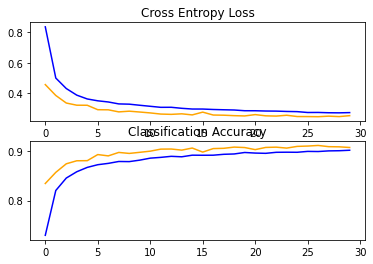

score > 90.360
loss > 0.260
[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.82      0.90      0.86      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.80      0.89      0.84      1000
       dress       0.90      0.91      0.91      1000
        coat       0.84      0.80      0.82      1000
      sandal       0.99      0.97      0.98      1000
       shirt       0.78      0.67      0.72      1000
     sneaker       0.95      0.98      0.96      1000
         bag       0.98      0.98      0.98      1000
  ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# run the test harness for evaluating a model
def run_test_harness2():
    # load dataset
    # trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    # trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    #devide train data to train and test
    train_X,test_X,train_Y,test_Y= train_test_split(trainX,trainY, random_state=0)
    # fit model
    history = model.fit(train_X, train_Y,validation_data=(test_X,test_Y), epochs=30, batch_size=32, verbose=2)
    # learning curves
    summarize_diagnostics([history])

    # save model
    # model.save('final_model2.h5')
   
    #evaluate model
    loss, acc = model.evaluate(testX, testY, verbose=0)
    print('score > %.3f' % (acc * 100.0))
    print('loss > %.3f' % (loss) )

    # make predictions on the test set
    preds = model.predict(testX)
    # show a nicely formatted classification report
   
    print("[INFO] evaluating network...")
    print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),target_names=labelNames))

    return model
# entry point, run the test harness
model2 = run_test_harness2()

In [ ]:
from tensorflow.keras import backend as K
from imutils import build_montages
import numpy as np
import cv2

def test_model(model):
  # initialize our list of output images
  images = []
  # randomly select a few testing fashion items
  for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
    # classify the clothing
    model: Sequential = model
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labelNames[prediction[0]]
  
    # extract the image from the testData if using "channels_first"
    # ordering
    if K.image_data_format() == "channels_first":
      image = (testX[i][0] * 255).astype("uint8")
  
    # otherwise we are using "channels_last" ordering
    else:
      image = (testX[i] * 255).astype("uint8")

    # initialize the text label color as green (correct)
    color = (0, 255, 0)
    # otherwise, the class label prediction is incorrect
    if prediction[0] != np.argmax(testY[i]):
      color = (255, 0, 0)
 
    # merge the channels into one image and resize the image from
    # 28x28 to 96x96 so we can better see it and then draw the
    # predicted label on the image
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,color, 2)
    # add the image to our list of output images
    images.append(image)
  # construct the montage for the images
  montage = build_montages(images, (96, 96), (4, 4))[0]
  # show the output montage with matplotlib
  pyplot.imshow( montage)
  # cv2.imshow("Fashion MNIST", montage)  
  # cv2.waitKey(0)

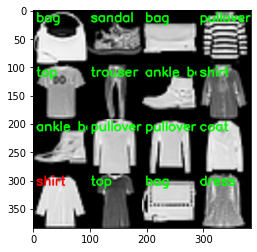

In [17]:
test_model(model2)

In [ ]:
# run the test harness for evaluating a model
def run_test_harness3():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
 
# entry point, run the test harness
run_test_harness3()

> 90.230


In [ ]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [ ]:
# make a prediction for a new image.

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    prediction =result.argmax(axis=1)
	  # label = labelNames[prediction[0]]
    print(result)
    print(prediction[0])
    labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]
    print(labelNames[prediction[0]])
# entry point, run the example
run_example()

[[1.3002412e-03 9.3641279e-07 9.8969370e-01 2.0692752e-04 2.5848064e-03
  4.9755354e-06 6.1947624e-03 2.2256681e-06 5.6870704e-06 5.7314560e-06]]
2
pullover
